In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

In [2]:
finviz_url='https://finviz.com/quote.ashx?t='
tickers=['META','AAPL','AMZN','GOOGL']

In [3]:
news_tables={}

In [4]:
for ticker in tickers:
    url=finviz_url+ticker

    req= Request(url=url, headers={'user-agent': 'my-app'})
    response= urlopen(req)
    html = BeautifulSoup(response,'html')
    news_table=html.find(id='news-table')
    news_tables[ticker]=news_table

In [5]:
print(news_tables)

{'META': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr class="cursor-pointer" onclick="trackAndOpenNews(event, 'Motley Fool', 'https://finance.yahoo.com/m/030839ae-f96d-317f-91fa-636173a352fc/ai-in-gaming-doesn%27t-mean.html');">
<td align="right" width="130">
            Aug-27-23 09:21AM
        </td>
<td align="left">
<div class="news-link-container">
<div class="news-link-left">
<a class="tab-link-news" href="https://finance.yahoo.com/m/030839ae-f96d-317f-91fa-636173a352fc/ai-in-gaming-doesn%27t-mean.html" rel="nofollow" target="_blank">AI in Gaming Doesn't Mean What You Think It Does... Yet</a>
</div>
<div class="news-link-right">
<span>(Motley Fool)</span></div></div></td></tr>
<tr class="cursor-pointer" onclick="trackAndOpenNews(event, 'Yahoo Finance', 'https://finance.yahoo.com/news/why-the-us-war-with-big-tech-could-have-unintended-consequences-130045555.html');">
<td align="right" width="130">
            09:00

In [6]:
meta_data=news_tables['META']

In [7]:
meta_rows=meta_data.find_all('tr')

In [8]:
print(meta_rows)

[<tr class="cursor-pointer" onclick="trackAndOpenNews(event, 'Motley Fool', 'https://finance.yahoo.com/m/030839ae-f96d-317f-91fa-636173a352fc/ai-in-gaming-doesn%27t-mean.html');">
<td align="right" width="130">
            Aug-27-23 09:21AM
        </td>
<td align="left">
<div class="news-link-container">
<div class="news-link-left">
<a class="tab-link-news" href="https://finance.yahoo.com/m/030839ae-f96d-317f-91fa-636173a352fc/ai-in-gaming-doesn%27t-mean.html" rel="nofollow" target="_blank">AI in Gaming Doesn't Mean What You Think It Does... Yet</a>
</div>
<div class="news-link-right">
<span>(Motley Fool)</span></div></div></td></tr>, <tr class="cursor-pointer" onclick="trackAndOpenNews(event, 'Yahoo Finance', 'https://finance.yahoo.com/news/why-the-us-war-with-big-tech-could-have-unintended-consequences-130045555.html');">
<td align="right" width="130">
            09:00AM
        </td>
<td align="left">
<div class="news-link-container">
<div class="news-link-left">
<a class="tab-lin

In [9]:
for index,row in enumerate(meta_rows):
    title = row.a.text
    timestamp = row.td.text
    print(timestamp+''+title)


            Aug-27-23 09:21AM
        AI in Gaming Doesn't Mean What You Think It Does... Yet

            09:00AM
        Why the US war with Big Tech could have unintended consequences

            06:12AM
        1 Hot E-Commerce Stock a Better Buy Than Shopify?

            03:56AM
        Meta Platforms: One Chart Explains the Mega-Rally

            Aug-26-23 10:35AM
        10 Best Performing Technology ETFs in 2023

            Aug-25-23 05:11PM
        Big Tech companies brace for impact of EU regulations

            02:36PM
        The One Generative AI Risk That No One Is Talking About

            01:41PM
        Amazon, Google, Meta Prep Artificial Intelligence Announcements

            12:33PM
        Is Meta Platforms (META) Stock Modestly Undervalued?

            11:31AM
        Meta Platforms (META) Down 8% Since Last Earnings Report: Can It Rebound?

            09:28AM
        Its Not Too Late: Heres How to Get In on the $725 Million Facebook Settlement.

       

In [10]:
parsed_data=[]
for ticker,news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title= row.a.text
        date_data=row.td.text.strip().split(" ")
        
        if len(date_data)==1:
            time = date_data[0]
        else:
            date=date_data[0]
            time=date_data[1]
            
        parsed_data.append([ticker,date,time,title])
        print([parsed_data])
        

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[['META', 'Aug-27-23', '09:21AM', "AI in Gaming Doesn't Mean What You Think It Does... Yet"], ['META', 'Aug-27-23', '09:00AM', 'Why the US war with Big Tech could have unintended consequences'], ['META', 'Aug-27-23', '06:12AM', '1 Hot E-Commerce Stock a Better Buy Than Shopify?'], ['META', 'Aug-27-23', '03:56AM', 'Meta Platforms: One Chart Explains the Mega-Rally'], ['META', 'Aug-26-23', '10:35AM', '10 Best Performing Technology ETFs in 2023'], ['META', 'Aug-25-23', '05:11PM', 'Big Tech companies brace for impact of EU regulations'], ['META', 'Aug-25-23', '02:36PM', 'The One Generative AI Risk That No One Is Talking About'], ['META', 'Aug-25-23', '01:41PM', 'Amazon, Google, Meta Prep Artificial Intelligence Announcements'], ['META', 'Aug-25-23', '12:33PM', 'Is Meta Platforms (META) Stock Modestly Undervalued?'], ['META', 'Aug-25-23', '11:31AM', 'Meta Platforms (META) Down 8% Since Last Earnings Report: Can It Rebound?'], ['META', 'Aug-25-23', '09:28AM', 'Its Not Too Late: Heres How to

In [11]:
import nltk

In [12]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [14]:
df= pd.DataFrame(parsed_data, columns=['ticker','date','time','title'])

In [15]:
df.head()

,ticker,date,time,title
0,META,Aug-27-23,09:21AM,AI in Gaming Doesn't Mean What You Think It Do...
1,META,Aug-27-23,09:00AM,Why the US war with Big Tech could have uninte...
2,META,Aug-27-23,06:12AM,1 Hot E-Commerce Stock a Better Buy Than Shopify?
3,META,Aug-27-23,03:56AM,Meta Platforms: One Chart Explains the Mega-Rally
4,META,Aug-26-23,10:35AM,10 Best Performing Technology ETFs in 2023


In [16]:
vader=SentimentIntensityAnalyzer()

In [17]:
vader.polarity_scores("Everything is good")

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [18]:
f= lambda title: vader.polarity_scores(title)['compound']
df['compound']=df['title'].apply(f)

In [19]:
df.head()

,ticker,date,time,title,compound
0,META,Aug-27-23,09:21AM,AI in Gaming Doesn't Mean What You Think It Do...,0.0000
1,META,Aug-27-23,09:00AM,Why the US war with Big Tech could have uninte...,-0.5994
2,META,Aug-27-23,06:12AM,1 Hot E-Commerce Stock a Better Buy Than Shopify?,0.4404
3,META,Aug-27-23,03:56AM,Meta Platforms: One Chart Explains the Mega-Rally,0.0000
4,META,Aug-26-23,10:35AM,10 Best Performing Technology ETFs in 2023,0.6369


In [20]:
df['date']=pd.to_datetime(df.date).dt.date

In [21]:
import matplotlib.pyplot as plt

In [22]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [23]:
mean_df=df.groupby(['ticker','date']).mean()

C:\Users\siddh\AppData\Local\Temp\ipykernel_13984\3940997173.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df=df.groupby(['ticker','date']).mean()


In [24]:
mean_df=mean_df.unstack()
mean_df=mean_df.xs('compound',axis="columns").transpose()

In [25]:
mean_df

ticker,AAPL,AMZN,GOOGL,META
date,,,,
2023-08-18,NaN,NaN,NaN,-0.170000
2023-08-19,0.156900,NaN,NaN,0.025550
2023-08-20,0.189925,NaN,0.305100,0.096829
2023-08-21,0.008815,NaN,0.044825,-0.127905
2023-08-22,0.106092,0.253875,0.209673,-0.079212
2023-08-23,0.102533,0.185813,0.231071,-0.076484
2023-08-24,0.249300,0.168838,0.093536,0.102620
2023-08-25,0.115200,0.142311,0.120720,0.042791
2023-08-26,0.365533,0.137986,0.328960,0.636900


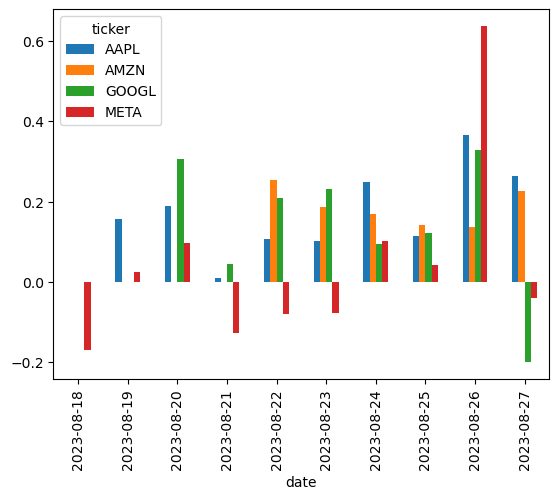

In [26]:
mean_df.plot(kind='bar')
plt.show()

In [27]:
mean_df.describe()

ticker,AAPL,AMZN,GOOGL,META
count,9.000000,6.000000,8.000000,10.000000
mean,0.173042,0.185837,0.141761,0.041134
std,0.106823,0.046328,0.170353,0.228540
min,0.008815,0.137986,-0.199800,-0.170000
25%,0.106092,0.148943,0.081359,-0.078530
50%,0.156900,0.177326,0.165197,-0.007100
75%,0.249300,0.216103,0.249579,0.083319
max,0.365533,0.253875,0.328960,0.636900
